In [0]:
# Mask R-CNN reference code
# https://www.cnblogs.com/hellcat/p/9987442.html


# the reference web of Colab with google drive : https://www.jianshu.com/p/ce2e63d1c10c
# 戴入檔案的方式， 
# COLAB  0:從Local端的路徑  
#        1:從Google Drive 中載入 

import os
import pandas as pd
import numpy as np

IS_COLAB = 1

if IS_COLAB == 1:
  !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
  !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
  !apt-get update -qq 2>&1 > /dev/null
  !apt-get -y install -qq google-drive-ocamlfuse fuse
  from google.colab import auth
  auth.authenticate_user()
  from oauth2client.client import GoogleCredentials
  creds = GoogleCredentials.get_application_default()
  import getpass
  !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
  vcode = getpass.getpass()
  !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

  !mkdir -p drive
  !google-drive-ocamlfuse drive

  # 此处为google drive中的文件路径,drive为之前指定的工作根目录，要加上
  os.chdir("drive/Colab Notebooks/ice berg") 
  !ls

E: Package 'python-software-properties' has no installation candidate
··········
drive	       log			 submission.csv  train.json
iceberg.ipynb  sample_submission.csv	 test.json	 train.json.7z
iceberg.png    sample_submission.csv.7z  test.json.7z


In [0]:
import matplotlib.pyplot as plt
import numpy as np

IMAGE_WIDTH = 75 
IMAGE_HEIGHT = 75

def list_to_array(band1): 
    return np.array(band1).reshape(IMAGE_WIDTH, IMAGE_HEIGHT)

def normalization_array(min_val, max_val, band):    
    band = np.round(((band - min_val) * 255 / (max_val - min_val)))                  
    return band

def display_ice_berg(band_1, band_2, ice_inc_angle_train, is_iceberg, index_base=0):  
  fig, ax = plt.subplots(figsize=(18 , 5))
  fig.subplots_adjust(hspace=0.4, wspace=0.1)   
 
  for i in range(6):
    plot_index = i*2+1 
    plt.subplot(2, 6, plot_index)
    plt.title("ice berg 1 : {}-{}".format(is_iceberg[i+index_base], ice_inc_angle_train[i+index_base][0]))        
    #plt.xticks([])
    #plt.yticks([])
    plt.axis("off")
    plt.imshow(band_1[i+index_base].reshape(75,75), cmap="gray")
   
    plot_index += 1
    plt.subplot(2, 6, plot_index)  
    plt.title("ice berg 2 : {}-{}".format(is_iceberg[i+index_base],ice_inc_angle_train[i+index_base][0]))   
    plt.axis("off")
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(band_2[i+index_base].reshape(75,75), cmap="gray")

def display_switch_image(original_image, horizontal_image, vertical_image, index_base=0):  
  fig, ax = plt.subplots(figsize=(18 , 18))
  fig.subplots_adjust(hspace=0.4, wspace=0.1)   
 
  for i in range(12):
    plot_index = i*3+1 
    plt.subplot(6, 6, plot_index)
    plt.title("original image")  
    plt.axis("off")
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(original_image[i+index_base].reshape(75,75), cmap="gray")
   
    plot_index += 1
    plt.subplot(6, 6, plot_index)  
    plt.title("horizontal image")   
    plt.axis("off")
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(horizontal_image[i+index_base].reshape(75,75), cmap="gray")
    
    plot_index += 1
    plt.subplot(6, 6, plot_index)  
    plt.title("vertical image")   
    plt.axis("off")
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(vertical_image[i+index_base].reshape(75,75), cmap="gray")
    


In [2]:
iceberg = pd.read_json("train.json")
iceberg.info()
iceberg.head()

# filter out data when inc_angle equals 'na'
print ('=== train data without na ===')
train_data_without_na = iceberg[iceberg['inc_angle'] != 'na']
print ('the number of is ice berg : ', len(train_data_without_na[train_data_without_na['is_iceberg'] == 1]))
print ('the number of is not ice berg : ', len(train_data_without_na[train_data_without_na['is_iceberg'] == 0]))

ice_inc_angle_train = np.array(train_data_without_na['inc_angle']).reshape(-1,1)
ice_berg_train = np.array(train_data_without_na['is_iceberg'])

ice_band_1_train = np.array([band for band in train_data_without_na['band_1'].apply(list_to_array)]) 
band_1_min_val = ice_band_1_train.min()
band_1_max_val = ice_band_1_train.max()
print ("band 1 min:{} max:{}".format(band_1_min_val, band_1_max_val))

ice_band_2_train = np.array([band for band in train_data_without_na['band_2'].apply(list_to_array)])
band_2_min_val = ice_band_2_train.min()
band_2_max_val = ice_band_2_train.max()
print ("band 2 min:{} max:{}".format(band_2_min_val, band_2_max_val))

NameError: ignored

In [0]:

#import pandas as pd
'''
iceberg_test = pd.read_json("test.json")
iceberg_test.info()
iceberg_test.head()

#print ('=== test data without na ===')
test_data_without_na = iceberg_test[iceberg_test['inc_angle'] != 'na']
ice_inc_angle_test = np.array(test_data_without_na['inc_angle']).reshape(-1,1)

#print (ice_inc_angle_test.max(), ice_inc_angle_test.min())
ice_band_1_test = np.array([band for band in test_data_without_na['band_1'].apply(list_to_array)]) 
#band_1_test_min_val = ice_band_1_test.min()
#band_1_test_max_val = ice_band_1_test.max()
#print ("band 1 min:{} max:{}".format(band_1_test_min_val, band_1_test_max_val))

ice_band_2_test = np.array([band for band in test_data_without_na['band_2'].apply(list_to_array)]) 
#band_2_test_min_val = ice_band_2_test.min()
#band_2_test_max_val = ice_band_2_test.max()
#print ("band 2 min:{} max:{}".format(band_2_test_min_val, band_2_test_max_val))
 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8424 entries, 0 to 8423
Data columns (total 4 columns):
band_1       8424 non-null object
band_2       8424 non-null object
id           8424 non-null object
inc_angle    8424 non-null float64
dtypes: float64(1), object(3)
memory usage: 263.3+ KB


/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [0]:
from sklearn.model_selection import train_test_split
# find null data for any column on each row  
# na = iceberg[iceberg.isna().any(axis=1)]
np.random.seed(7718)

#band_1_max_val = band_1_max_val if (band_1_test_max_val > band_1_max_val )else band_1_test_max_val
#band_2_max_val = band_2_max_val if (band_2_test_max_val > band_2_max_val )else band_2_test_max_val

#band_1_min_val = band_1_min_val if (band_1_test_min_val > band_1_min_val )else band_1_test_min_val
#band_2_min_val = band_2_min_val if (band_2_test_min_val > band_2_min_val )else band_2_test_min_val

##
band_1_min_val=-45.680545806884766 
band_1_max_val=37.090523
band_2_min_val=-49.0835 
band_2_max_val=37.09052276611328

#print ("band 1 min:{} max:{}".format(band_1_test_min_val, band_1_test_max_val))
#print ("band 2 min:{} max:{}".format(band_2_test_min_val, band_2_test_max_val))

# split data set into ice berg dataset and non ice berg dataset
# train_data, valid_data, _ , _ = train_test_split(train_data_without_na, train_data_without_na['is_iceberg'],test_size=0.3, random_state=42)


In [0]:
import math
import random
from keras.preprocessing.image import ImageDataGenerator 
def data_generator(band_1, band_2, angle, is_ice_berg, batch_size):
    
    #np.random.seed(1234)
    
    # band image data generator
    
    band_1 = band_1[:,:,:,np.newaxis]
    band_2 = band_2[:,:,:,np.newaxis]   
    #band_concatenate = np.concatenate([band_1,band_2 ], axis=-1)
    #print (band_concatenate.shape)
    data_len = len(band_1)
    data_epochs = math.floor(data_len / batch_size) - 1
    data_index = np.arange(data_len)
   
    angle = angle / 360
    band_augmentation = ImageDataGenerator(height_shift_range=[-10,10], width_shift_range=[-10,10], rotation_range=270)
   
    end_index=0
    while True:
      #seed_val = 123 #random.randint(100,1199)
      band_1_augmentation = band_augmentation.flow(band_1, batch_size = data_len, shuffle = False, seed = 23)
      band_2_augmentation = band_augmentation.flow(band_2, batch_size = data_len, shuffle = False, seed = 23)  
      #band_1_augmentation = band_augmentation.flow(band_concatenate, batch_size = data_len, shuffle = False)#, seed = seed_val)
      band_1 = next(band_1_augmentation)
      band_2 = next(band_2_augmentation)     
      for epochs_index in range (data_epochs):        
        start_index = epochs_index * batch_size
        end_index = (epochs_index + 1) * batch_size
        #print("1", start_index, end_index)
        band_concatenate = np.concatenate([band_1[start_index:end_index]/255, band_2[start_index:end_index]/255], axis=-1)  
         
        #band = band_1[start_index:end_index]/255
        yield [band_concatenate, angle[start_index:end_index]], [is_ice_berg[start_index:end_index]]
        #yield [band_1[start_index:end_index], band_2[start_index:end_index], angle[start_index:end_index]], [is_ice_berg[start_index:end_index]]
      
      if end_index < data_len:        
        start_index = data_epochs * batch_size
        end_index = data_len
        #print("2",start_index, end_index) 
        band_concatenate = np.concatenate([band_1[start_index:end_index]/255, band_2[start_index:end_index]/255], axis=-1)  
        # band = band_1[start_index:end_index]/255
        yield [band_concatenate, angle[start_index:end_index]], [is_ice_berg[start_index:end_index]]
        #yield [band_1[start_index:end_index], band_2[start_index:end_index], angle[start_index:end_index]], [is_ice_berg[start_index:end_index]]
        
#data_generator(ice_band_1_train, ice_band_2_train, ice_inc_angle_train, ice_berg_train , len(ice_band_1_train))   
train_set = data_generator(ice_band_1_train[0:1000], ice_band_2_train[0:1000], ice_inc_angle_train[0:1000], ice_berg_train[0:1000] , 64)
test_set = data_generator(ice_band_1_train[1000:1471], ice_band_2_train[1000:1471], ice_inc_angle_train[1000:1471], ice_berg_train[1000:1471] , 64)

(64, 75, 75, 1) (64, 75, 75, 1) 64


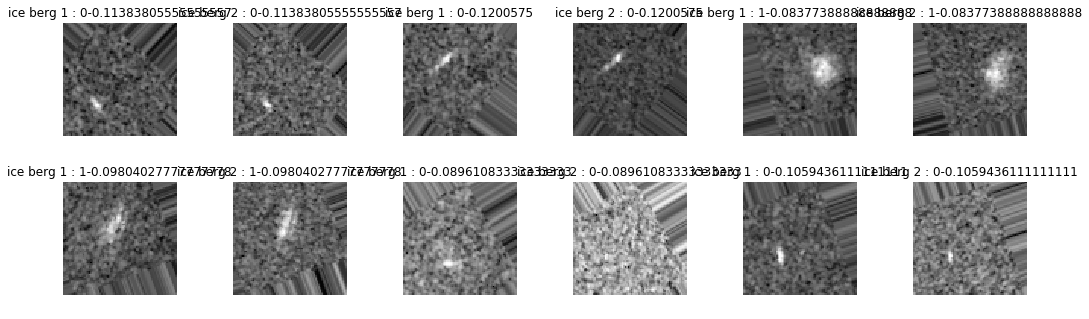

In [0]:
x, y = next(train_set)
print (x[0].shape ,x[1].shape, len(y[0]))
display_ice_berg(x[0], x[1], x[2], y[0])

(64, 75, 75, 1) (64, 75, 75, 1) 64


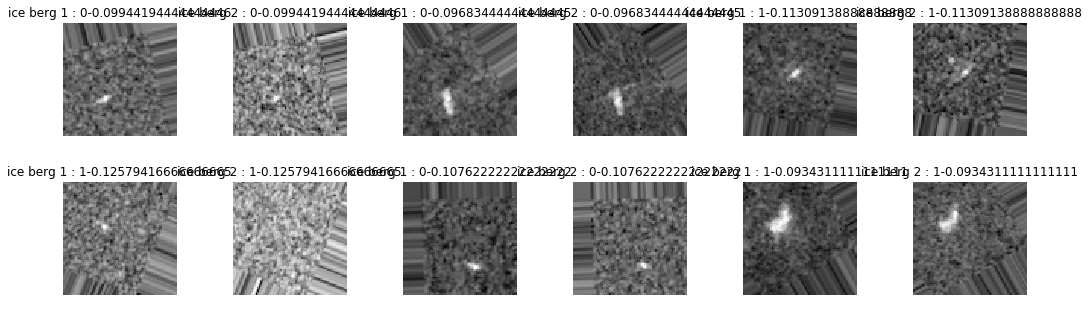

In [0]:
x, y = next(test_set)
print (x[0].shape ,x[1].shape, len(y[0]))
display_ice_berg(x[0], x[1], x[2], y[0])

[[55. 57. 52. ... 62. 59. 47.]
 [52. 55. 56. ... 59. 52. 43.]
 [52. 57. 61. ... 57. 55. 40.]
 ...
 [51. 52. 47. ... 48. 61. 59.]
 [43. 55. 52. ... 56. 58. 56.]
 [51. 58. 57. ... 58. 55. 54.]]
[[65. 58. 53. ... 59. 58. 64.]
 [53. 46. 52. ... 44. 62. 67.]
 [46. 36. 52. ... 52. 50. 58.]
 ...
 [63. 63. 56. ... 70. 64. 60.]
 [58. 58. 59. ... 60. 62. 46.]
 [56. 60. 64. ... 55. 60. 59.]]
[[55. 57. 52. ... 62. 59. 47.]
 [52. 55. 56. ... 59. 52. 43.]
 [52. 57. 61. ... 57. 55. 40.]
 ...
 [51. 52. 47. ... 48. 61. 59.]
 [43. 55. 52. ... 56. 58. 56.]
 [51. 58. 57. ... 58. 55. 54.]]
[[65. 58. 53. ... 59. 58. 64.]
 [53. 46. 52. ... 44. 62. 67.]
 [46. 36. 52. ... 52. 50. 58.]
 ...
 [63. 63. 56. ... 70. 64. 60.]
 [58. 58. 59. ... 60. 62. 46.]
 [56. 60. 64. ... 55. 60. 59.]]


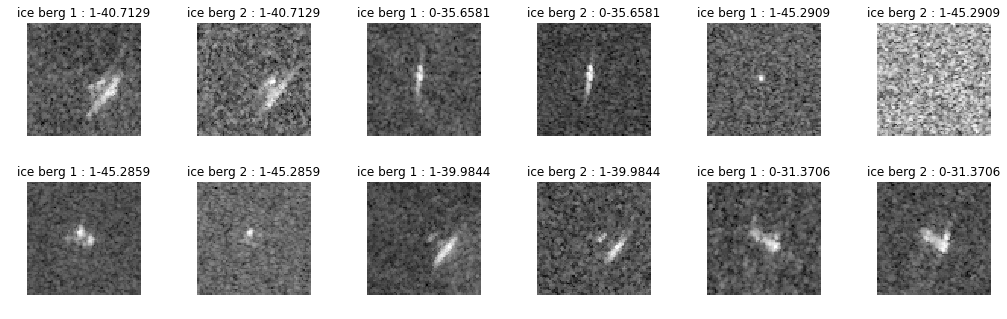

In [0]:
# Transfor data to gray image 
ice_band_1_train = normalization_array(band_1_min_val, band_1_max_val, ice_band_1_train)
ice_band_2_train = normalization_array(band_2_min_val, band_2_max_val, ice_band_2_train)
print (ice_band_1_train[0])
print (ice_band_2_train[0])
display_ice_berg(ice_band_1_train, ice_band_2_train, ice_inc_angle_train, ice_berg_train, 200)

#ice_band_1_train = ice_band_1_train / 255
#ice_band_2_train = ice_band_2_train / 255
#ice_inc_angle_train = ice_inc_angle_train / 360
print (ice_band_1_train[0])
print (ice_band_2_train[0])

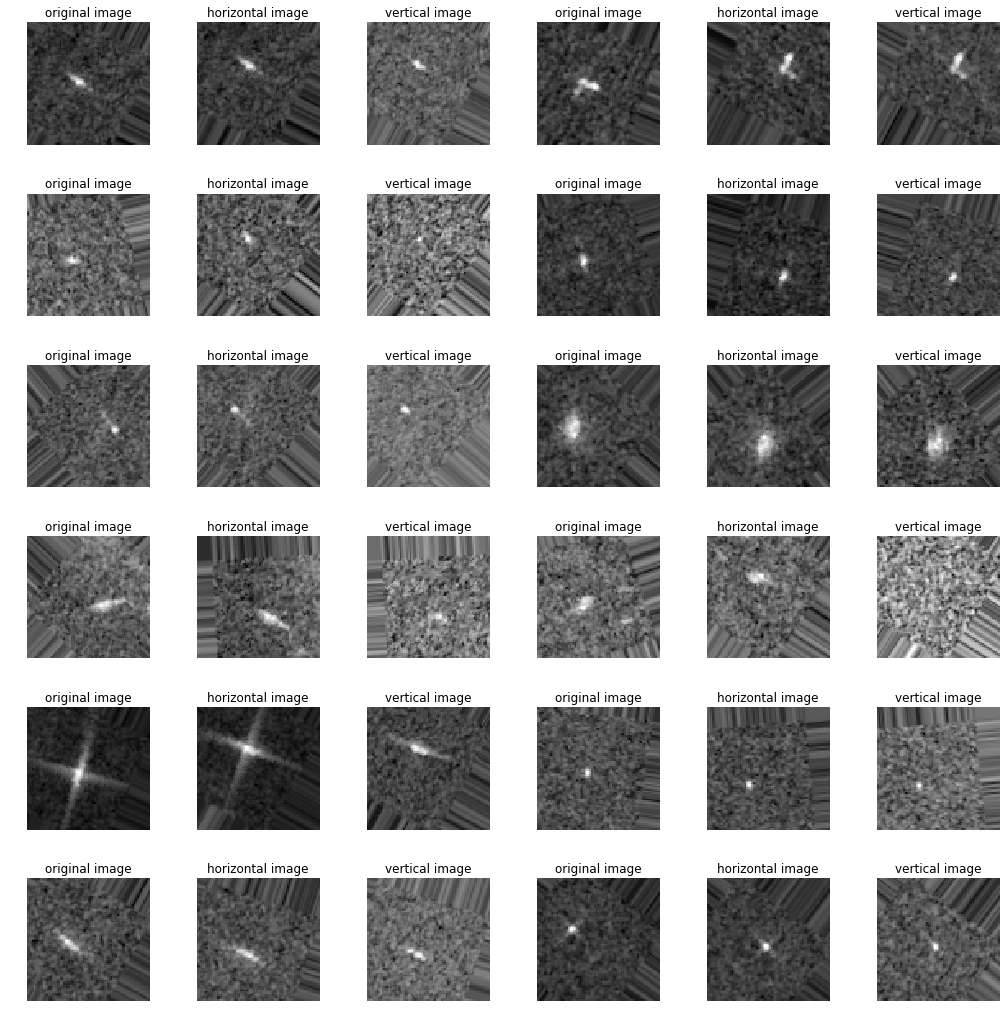

In [0]:
from keras.preprocessing.image import ImageDataGenerator 

#np.random.seed(21)
#index = np.arange(len(train_data))
#np.random.shuffle(index)

#datagen_vertical = ImageDataGenerator(vertical_flip = True)  
#datagen_horizontal = ImageDataGenerator(horizontal_flip=True)
 

datagen_original = ImageDataGenerator(height_shift_range=[-10,10], width_shift_range=[-10,10], rotation_range=270)
datagen_original2 = ImageDataGenerator(height_shift_range=[-10,10], rotation_range=270) 
datagen_original3 = ImageDataGenerator(width_shift_range=[-10,10], rotation_range=270)  
# band 1 image data generator
band_1_train = ice_band_1_train[:,:,:,np.newaxis]
# band 1 image data generator
band_2_train = ice_band_2_train[:,:,:,np.newaxis]
#vertical_band_1_datagen_image = datagen_vertical.flow(band_1_train, batch_size = len(band_1_train) , shuffle = False, seed=21)
#horizontal_band_1_datagen_image = datagen_horizontal.flow(band_1_train, batch_size = data_length, shuffle = False,seed =21)
original_band_1_datagen_image = datagen_original.flow(band_1_train, batch_size = len(band_1_train), shuffle = False,seed =21)
original_band_2_datagen_image = datagen_original.flow(band_2_train, batch_size = len(band_1_train), shuffle = False,seed =21)
#original_band_2_datagen_image = datagen_original2.flow(band_2_train, batch_size = len(band_1_train), shuffle = False,seed =21)
original_band_3_datagen_image = datagen_original3.flow(band_1_train, batch_size = len(band_1_train), shuffle = False,seed =21)
#vertical_band_1_image = next(vertical_band_1_datagen_image) 
#horizontal_band_1_image = next(vertical_band_1_datagen_image)
band_1_train1 = next(original_band_1_datagen_image)
band_1_train2 = next(original_band_2_datagen_image)
band_1_train3 = next(original_band_3_datagen_image)
display_switch_image(band_1_train3, band_1_train1, band_1_train2, 0)


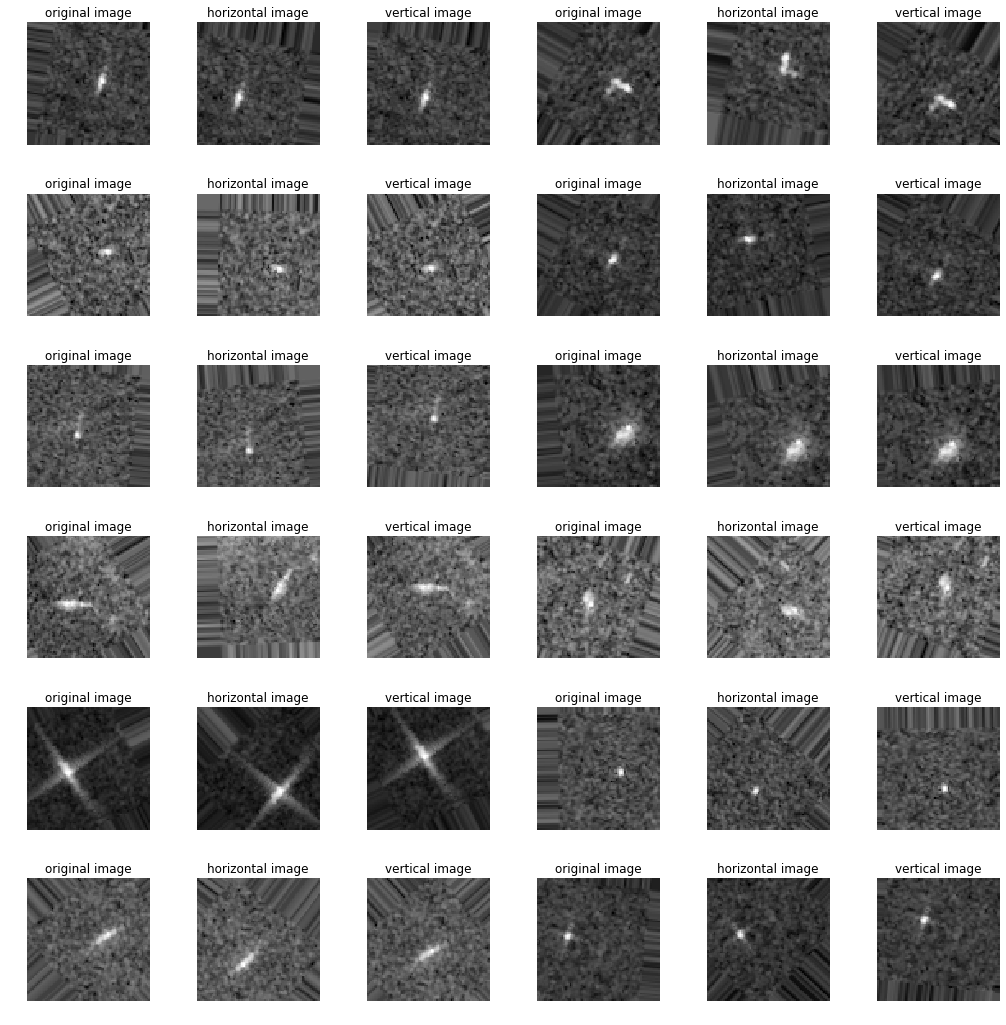

In [0]:
band_1_train1 = next(original_band_1_datagen_image)
band_1_train2 = next(original_band_2_datagen_image)
band_1_train3 = next(original_band_3_datagen_image)
display_switch_image(band_1_train3, band_1_train1, band_1_train2, 0)


In [0]:
# band 2 image data generator
#band_2_train = ice_band_2_train[:,:,:,np.newaxis]

#original_band_1_image = next(ice_band_1_train)

#vertical_band_2_datagen_image = datagen_vertical.flow(band_2_train, batch_size = data_length, shuffle = False, seed=21)
#horizontal_band_2_datagen_image = datagen_horizontal.flow(band_2_train, batch_size = data_length, shuffle = False,seed =21)
#original_band_2_datagen_image = datagen_original.flow(band_2_train, batch_size = data_length, shuffle = False,seed =21)

#vertical_band_2_image = next(vertical_band_2_datagen_image)
#horizontal_band_2_image = next(horizontal_band_2_datagen_image)
#original_band_2_image = next(original_band_2_datagen_image)

#display_switch_image(band_2_train, horizontal_band_2_image, vertical_band_2_image)  

In [0]:

#temp = np.concatenate((band_1_train, vertical_band_1_image) , axis = 0) 
#band_1_train = np.concatenate((temp, horizontal_band_1_image) , axis = 0)
#print (band_1_train.shape)
 
#temp = np.concatenate((band_2_train, vertical_band_2_image) , axis = 0) 
#band_2_train = np.concatenate((temp, horizontal_band_2_image) , axis = 0)
#print (band_2_train.shape)

#ice_inc_angle_train =np.concatenate((ice_inc_angle_train, ice_inc_angle_train, ice_inc_angle_train), axis=0)
#print (ice_inc_angle_train.shape)

#ice_berg_train = np.concatenate((ice_berg_train, ice_berg_train, ice_berg_train) , axis=0)
#print (ice_berg_train.shape)

#band_1_train = band_1_train / 255
#band_2_train = band_2_train / 255
#ice_inc_angle_train = ice_inc_angle_train / 360

In [0]:
#ice_band_reshape = ice_band_train.reshape(-1, 75, 75, 2) 
#print ("ice_band_reshape:", ice_band_reshape.shape)
#print (ice_band_reshape[0][0][0])
#print (ice_band_reshape[0][0][1])

#ice_band_concatenate = np.concatenate([ice_band_1, ice_band_2], axis = -1)
#print ("ice_band_concatenate:", ice_band_concatenate.shape)
#print(ice_band_concatenate[0][:][:][0])
#print(ice_band_concatenate[0][:][:][1])

ice_band_train_new_concatenate = np.concatenate([ice_band_1_train[:,:,:,np.newaxis], ice_band_2_train[:,:,:,np.newaxis]], axis = -1)
print ("ice_band_train_new_concatenate:", ice_band_train_new_concatenate.shape)
print (ice_band_train_new_concatenate[5][0][0])
print (ice_band_train_new_concatenate[5][0][1])
print (ice_berg_train[5])
print (ice_inc_angle_train[5])

#ice_band_valid_new_concatenate = np.concatenate([ice_band_1_valid[:,:,:,np.newaxis], ice_band_2_valid[:,:,:,np.newaxis]], axis = -1)
#print ("ice_band_valid_new_concatenate:", ice_band_valid_new_concatenate.shape)
#print (ice_band_valid_new_concatenate[0][0][0])
#print (ice_band_valid_new_concatenate[0][0][1])

In [0]:
 
import keras.layers as KL
import keras.models as KM
import tensorflow as tf
import keras.backend as K
import keras

# image data train
# 75 X 75
input_image = keras.Input (shape=[IMAGE_WIDTH, IMAGE_HEIGHT, 2], dtype='float32') # image 

x_11 = KL.Conv2D(16, (1, 1), padding='same', strides = 1, name='conv2d_lv1_11_1')(input_image)
x_11 = KL.BatchNormalization()(x_11)
x_11= KL.Activation('relu')(x_11)

x_13 = KL.Conv2D(16, (3, 3), padding='same', strides = 1, name='conv2d_lv1_33_1')(input_image)
x_13 = KL.BatchNormalization()(x_13)
x_13= KL.Activation('relu')(x_13)

x_15 = KL.Conv2D(16, (5, 5), padding='same', strides = 1, name='conv2d_lv1_55_1')(input_image) 
x_15 = KL.BatchNormalization()(x_15)
x_15= KL.Activation('relu')(x_15)

head_x =  KL.Concatenate()([x_11, x_13, x_15]) 

x = KL.Conv2D(16, (1,1), padding='same', strides = 1)(head_x)
x = KL.BatchNormalization()(x)
x = KL.Activation('relu')(x)
x = KL.MaxPooling2D(pool_size=(2,2), strides=2)(x)

x3 = KL.Conv2D(16, (3,3), padding='same', strides = 1)(head_x)
x3 = KL.BatchNormalization()(x3)
x3 = KL.Activation('relu')(x3)
x3 = KL.MaxPooling2D(pool_size=(2,2), strides=2)(x3)
head_x = KL.Concatenate()([x, x3])

x = KL.Conv2D(16, (1,1), padding='same', strides = 1)(head_x)
x = KL.BatchNormalization()(x)
x = KL.Activation('relu')(x)
x = KL.MaxPooling2D(pool_size=(2,2), strides=2)(x)

x3 = KL.Conv2D(16, (3,3), padding='same', strides = 1)(head_x)
x3 = KL.BatchNormalization()(x3)
x3 = KL.Activation('relu')(x3)
x3 = KL.MaxPooling2D(pool_size=(2,2), strides=2)(x3)
head_x = KL.Concatenate()([x, x3])
   
x = KL.Conv2D(16, (3,3), padding='same', strides = 1)(head_x)
x = KL.BatchNormalization()(x)
x = KL.Activation('relu')(x)
x = KL.MaxPooling2D(pool_size=(2,2), strides=2)(x)  
  
input_image_out = KL.Flatten()(x)

x = KL.Dense(512, activation='relu')(input_image_out)

x = KL.Dropout(0.5)(x)

x = KL.Dense(64, activation='relu')(input_image_out)

x = KL.Dropout(0.5)(x) 

#x = KL.Dense(1, activation='relu')(x)

input_angle = keras.Input (shape=[1], dtype='float32') # inc angle

angle_x = KL.Dense(32, activation='relu')(input_angle)

angle_x = KL.Dropout(0.5)(angle_x)

#angle_x = KL.Dense(1, activation='relu')(angle_x)

# add angle 
x = KL.concatenate([x, angle_x])
merge_output = KL.Dense(1, activation='sigmoid')(x)

model = KM.Model (inputs = [input_image, input_angle], outputs = merge_output, name='predict_iceberg')

#def mean_pred(y_true, y_pred):  
#  return K.mean(y_pred)

#model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy', 'mse'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_49 (InputLayer)           (None, 75, 75, 2)    0                                            
__________________________________________________________________________________________________
conv2d_lv1_11_1 (Conv2D)        (None, 75, 75, 16)   48          input_49[0][0]                   
__________________________________________________________________________________________________
conv2d_lv1_33_1 (Conv2D)        (None, 75, 75, 16)   304         input_49[0][0]                   
__________________________________________________________________________________________________
conv2d_lv1_55_1 (Conv2D)        (None, 75, 75, 16)   816         input_49[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [0]:
from keras.callbacks import ModelCheckpoint,CSVLogger
import datetime
import os.path as path

NAME = "ice_berg"
  
now = datetime.datetime.now()

model_dir = path.abspath(".")
print (model_dir)

# Directory for training logs
#log_dir = os.path.join(model_dir, "_{}{:%Y%m%dT%H%M}".format(NAME.lower(), now))
log_dir = os.path.join(model_dir, "log".format(NAME.lower(), now))

# Path to save after each epoch. Include placeholders that get filled by Keras.
checkpoint_path = os.path.join(log_dir, "{}_*epoch*_*loss*.h5".format(NAME.lower()))
    
checkpoint_path = checkpoint_path.replace("*epoch*", "{epoch:04d}")
checkpoint_path = checkpoint_path.replace("*loss*", "{val_loss:04f}")
print (checkpoint_path)

#msave = ModelCheckpoint("1.h5", monitor='val_acc', mode='max', save_best_only=True)
msave = ModelCheckpoint(checkpoint_path, monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False)
#csv=CSVLogger(checkpoint_path, append=True)
#cb = [csv, msave]
cb = [msave]

#model.fit(x=[ice_band_train_new_concatenate, ice_inc_angle_train ], y=ice_berg_train, batch_size=32, callbacks=cb , epochs=100, validation_split=0.3)
#data_generator(ice_band_1_train, ice_band_2_train, ice_inc_angle_train, ice_berg_train , len(ice_band_1_train))   
model.fit_generator(
            data_generator(ice_band_1_train[0:1000], ice_band_2_train[0:1000], ice_inc_angle_train[0:1000], ice_berg_train[0:1000], 64) ,
            initial_epoch = 0,
            epochs = 300,
            steps_per_epoch= 200,
            callbacks = cb,
            validation_data = data_generator(ice_band_1_train[1000:1417], ice_band_2_train[1000:1417], ice_inc_angle_train[1000:1417], ice_berg_train[1000:1417], 64),
            validation_steps= 50,
            max_queue_size=100,
            workers=0,
            use_multiprocessing=True,
        )


/content/drive/Colab Notebooks/ice berg/drive/Colab Notebooks/ice berg
/content/drive/Colab Notebooks/ice berg/drive/Colab Notebooks/ice berg/log/ice_berg_{epoch:04d}_{val_loss:04f}.h5
Epoch 1/300
200/200 [==============================] - 34s 172ms/step - loss: 0.5848 - acc: 0.6941 - val_loss: 1.2858 - val_acc: 0.5543
Epoch 2/300
200/200 [==============================] - 24s 119ms/step - loss: 0.5007 - acc: 0.7553 - val_loss: 1.4638 - val_acc: 0.5395
Epoch 3/300
200/200 [==============================] - 24s 120ms/step - loss: 0.4625 - acc: 0.7784 - val_loss: 0.8621 - val_acc: 0.6872
Epoch 4/300
200/200 [==============================] - 25s 124ms/step - loss: 0.4486 - acc: 0.7815 - val_loss: 1.0940 - val_acc: 0.6238
Epoch 5/300
200/200 [==============================] - 24s 121ms/step - loss: 0.4380 - acc: 0.7880 - val_loss: 0.9736 - val_acc: 0.6957
Epoch 6/300
200/200 [==============================] - 24s 119ms/step - loss: 0.4253 - acc: 0.7961 - val_loss: 3.0373 - val_acc: 0.5116

In [0]:
import math
import os

from keras.models import load_model
 
log_dir = os.path.join(os.path.abspath('.'), "log".format(NAME.lower(), now))

# Path to save after each epoch. Include placeholders that get filled by Keras.
#checkpoint_path = os.path.join(log_dir, "{}_{}.h5".format(NAME.lower(),"0032"))
checkpoint_path = os.path.join(log_dir, "{}.h5".format("ice_berg_0015_0.265302"))
print (checkpoint_path, path.exists(checkpoint_path))


load_model = load_model(checkpoint_path)
load_model.summary()

predict_result = load_model.evaluate(x=[ice_band_valid_new_concatenate, ice_inc_angle_valid], y= ice_berg_valid)
print (predict_result)

predict_result = load_model.predict(x=[ice_band_valid_new_concatenate, ice_inc_angle_valid]) 
print (np.round(predict_result, 1))

class_result = [0 if n <= .5 else 1 for n in predict_result]
class_result = class_result == ice_berg_valid  
class_result = class_result[class_result == True]
print (len (class_result)/ len(predict_result)) 

In [0]:
def display_test_data(band_1, band_2, ice_inc_angle_train):  
  fig, ax = plt.subplots(figsize=(18 , 18))
  fig.subplots_adjust(hspace=0.4, wspace=0.1)   
 
  for i in range(18):
    plot_index = i*2+1 
    plt.subplot(6, 6, plot_index)
    plt.title("ice berg 1 : {}".format(ice_inc_angle_train[i]))        
    plt.xticks([])
    plt.yticks([])
    plt.imshow(band_1[i].reshape(75,75), cmap="gray")
   
    plot_index += 1
    plt.subplot(6, 6, plot_index)  
    plt.title("ice berg 2 : {}".format(ice_inc_angle_train[i]))   
    plt.xticks([])
    plt.yticks([])
    plt.imshow(band_2[i].reshape(75,75), cmap="gray")

[[ 92.  94.  86. ...  97. 101.  98.]
 [ 90.  94.  90. ...  93.  98.  98.]
 [ 93.  96.  88. ...  88.  93.  98.]
 ...
 [ 96.  88.  92. ...  92.  83.  80.]
 [ 94. 102. 102. ...  91.  93.  88.]
 [ 97. 102. 105. ...  92.  93.  88.]]
[[81. 83. 74. ... 76. 74. 67.]
 [83. 83. 66. ... 66. 77. 70.]
 [74. 74. 70. ... 74. 77. 73.]
 ...
 [70. 74. 72. ... 76. 81. 76.]
 [68. 65. 73. ... 73. 79. 77.]
 [70. 65. 76. ... 75. 68. 64.]]
[[0.36078431 0.36862745 0.3372549  ... 0.38039216 0.39607843 0.38431373]
 [0.35294118 0.36862745 0.35294118 ... 0.36470588 0.38431373 0.38431373]
 [0.36470588 0.37647059 0.34509804 ... 0.34509804 0.36470588 0.38431373]
 ...
 [0.37647059 0.34509804 0.36078431 ... 0.36078431 0.3254902  0.31372549]
 [0.36862745 0.4        0.4        ... 0.35686275 0.36470588 0.34509804]
 [0.38039216 0.4        0.41176471 ... 0.36078431 0.36470588 0.34509804]]
[[0.31764706 0.3254902  0.29019608 ... 0.29803922 0.29019608 0.2627451 ]
 [0.3254902  0.3254902  0.25882353 ... 0.25882353 0.30196078 0.

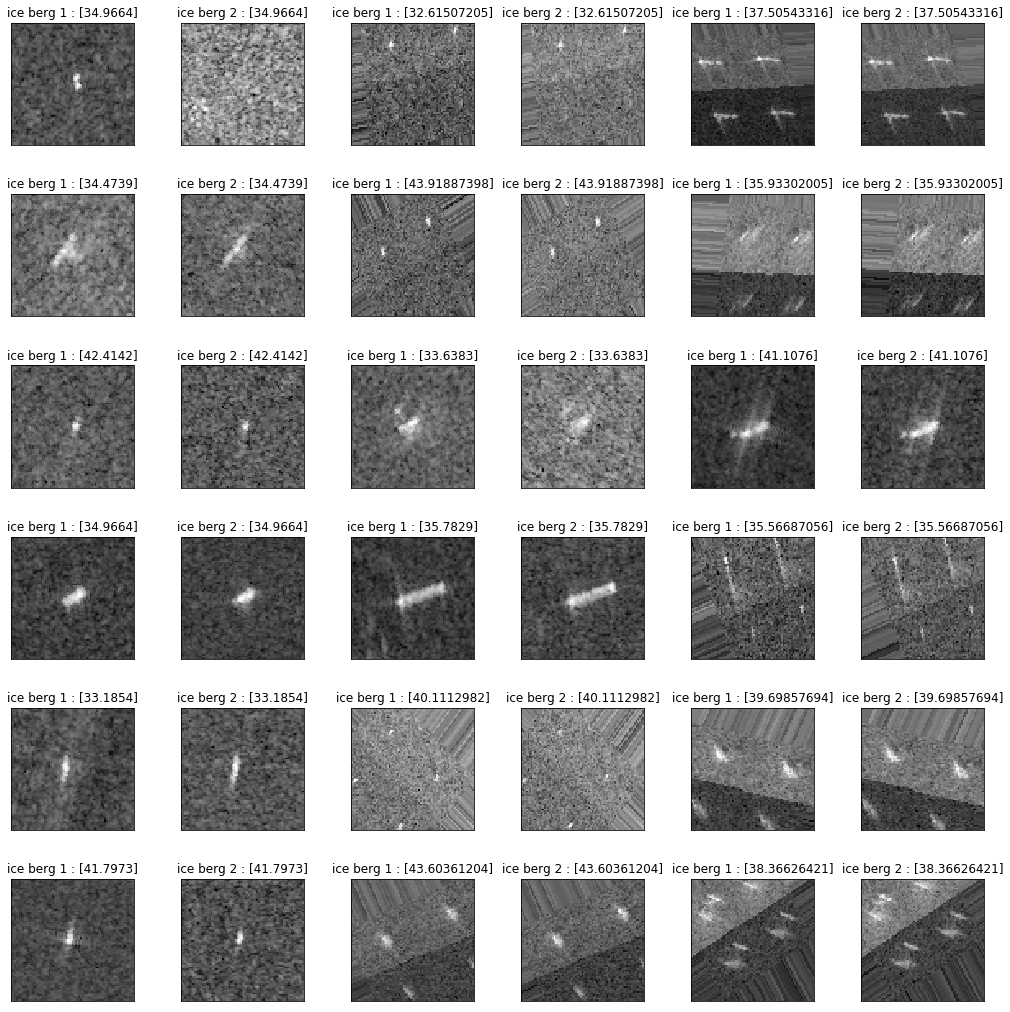

In [0]:
#test_data_without_na = iceberg_test[iceberg_test['inc_angle'] != 'na']

ice_band_1_test = np.array([band for band in test_data_without_na['band_1'].apply(list_to_array)]) 
ice_band_2_test = np.array([band for band in test_data_without_na['band_2'].apply(list_to_array)]) 
#ice_inc_angle_test = np.array(test_data_without_na['inc_angle']).reshape(-1,1)

# Test data to gray image 
ice_band_1_test = normalization_array(band_1_min_val, band_1_max_val, ice_band_1_test)
ice_band_2_test = normalization_array(band_2_min_val, band_2_max_val, ice_band_2_test)
print (ice_band_1_test[0])
print (ice_band_2_test[0])
display_test_data(ice_band_1_test, ice_band_2_test, ice_inc_angle_test)


# normalization data
ice_band_1_test = ice_band_1_test / 255
ice_band_2_test = ice_band_2_test / 255
ice_inc_angle_test = ice_inc_angle_test / 360
print (ice_band_1_test[0])
print (ice_band_2_test[0])

ice_band_test_new_concatenate = np.concatenate([ice_band_1_test[:,:,:,np.newaxis], ice_band_2_test[:,:,:,np.newaxis]], axis = -1)
print ("ice_band_valid_new_concatenate:", ice_band_test_new_concatenate.shape)
print (ice_band_test_new_concatenate[0][0][0])
print (ice_band_test_new_concatenate[0][0][1])



In [0]:

predict_result = load_model.predict(x=[ice_band_test_new_concatenate, ice_inc_angle_test]) 
predict_result = np.round(predict_result, 1)

save_result = pd.DataFrame()
save_result['id'] = test_data_without_na['id']
save_result['is_iceberg'] = predict_result
print (save_result.head())
save_result.to_csv("submission.csv", index=False)

In [0]:
from keras.utils.vis_utils import plot_model

# Create model object in inference mode. inference training
plot_model(model, to_file="iceberg.png", show_shapes=True, show_layer_names=True)